In [34]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#File path
csv_file_path = '../Resources/Data/diabetes_012_health_indicators_BRFSS2015.csv'

#Load the csv file
df = pd.read_csv(csv_file_path)

#Display first fews rows
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [36]:
# Define features and target variable
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

In [37]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Reduce dataset size for training (subset of 10,000 rows to avoid memory issues)
subset_size = 10000
X_train_small = X_train_scaled[:subset_size]
y_train_small = y_train[:subset_size]

In [39]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_small, y_train_small)

GaussianNB()

In [40]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled[:subset_size])

In [41]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test[:subset_size], y_pred_nb)
classification_rep_nb = classification_report(y_test[:subset_size], y_pred_nb, output_dict=True)

# Extract performance metrics
precision = [classification_rep_nb[str(float(i))]["precision"] for i in range(3)]
recall = [classification_rep_nb[str(float(i))]["recall"] for i in range(3)]
f1_score = [classification_rep_nb[str(float(i))]["f1-score"] for i in range(3)]

In [42]:
# Prepare for visualization
class_labels = ["No Diabetes (0)", "Pre-Diabetes (1)", "Diabetes (2)"]

In [43]:
# Precision
sns.barplot(x=class_labels, y=precision, ax=axes[0], palette="Blues")
axes[0].set_title("Precision by Class")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Precision")


C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\3384848816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=precision, ax=axes[0], palette="Blues")


Text(23.999999999999993, 0.5, 'Precision')

In [44]:
# Recall
sns.barplot(x=class_labels, y=recall, ax=axes[1], palette="Greens")
axes[1].set_title("Recall by Class")
axes[1].set_ylim(0, 1)
axes[1].set_ylabel("Recall")

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\963877842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=recall, ax=axes[1], palette="Greens")


Text(516.3529411764706, 0.5, 'Recall')

In [45]:
# F1 Score
sns.barplot(x=class_labels, y=f1_score, ax=axes[2], palette="Reds")
axes[2].set_title("F1 Score by Class")
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("F1 Score")

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\2989320667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=f1_score, ax=axes[2], palette="Reds")


Text(1008.7058823529413, 0.5, 'F1 Score')

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17964\3050745155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=precision, ax=axes[0], palette="Blues")


Text(0, 0.5, 'Precision')

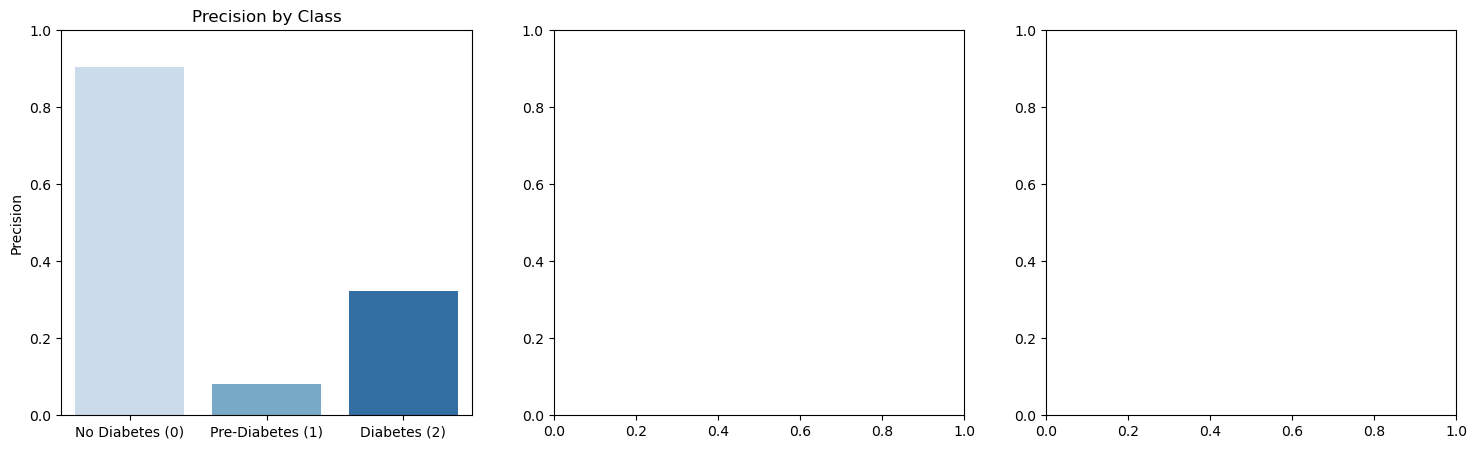

In [46]:
# Generate bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Precision
sns.barplot(x=class_labels, y=precision, ax=axes[0], palette="Blues")
axes[0].set_title("Precision by Class")
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Precision")
